# Classificar a base

* Define X, y

In [14]:
import pandas as pd
from pickle import load

scaler_data_set = load(open('models/scaler_data_set.pkl', 'rb'))
encoder_period_of_day = load(open('models/encoder_period_of_day.pkl', 'rb'))
encoder_day_of_week = load(open('models/encoder_day_of_week.pkl', 'rb'))
encoder_day_of_week = load(open('models/encoder_day_of_week.pkl', 'rb'))
kmeans = load(open('models/kmeans.pkl', 'rb'))
data_set = data_set = pd.read_csv('data/OHA-2021-9.csv')
data_set['PeriodOfDayEncoder'] = pd.Series(data=encoder_period_of_day.transform(data_set.PeriodOfDay.values))
data_set['DayOfWeekEncoder'] = pd.Series(data=encoder_day_of_week.transform(data_set.DayOfWeek.values))
X = scaler_data_set.transform(data_set.loc[:,['PeriodOfDayEncoder', 'DayOfWeekEncoder', 'Watts1', 'Watts2']])
y = data_set.WattsTotal
data_set['HouseholdRoutinesEncoder'] = kmeans.predict(X)
data_set.head()


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator KMe

AttributeError: 'KMeans' object has no attribute '_n_threads'

In [ ]:
data_set.loc[data_set.HouseholdRoutinesEncoder == 0, ['Watts1', 'Watts2']].describe()

In [12]:
import sklearn
sklearn.__version__

'1.0'

* Gráfico

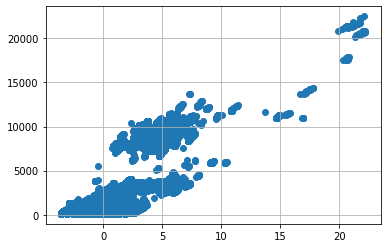

In [3]:
from matplotlib import pyplot as plt #para plotar os gráficos
plt.scatter(X.sum(axis=1), y) #posicionamento dos eixos x e y
plt.grid() #função que desenha a grade no nosso gráfico


In [4]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=1000)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
from pickle import dump
dump(kmeans, open('kmeans.pkl', 'wb'))

In [94]:
[kmeans.cluster_centers_[0:3,] , kmeans.labels_[0:10,]]

[array([[-1.43522978,  1.44130943, -0.20538437, -0.22035497],
        [ 1.03093219,  0.92153189,  4.58866265,  0.04515843],
        [-0.83945785,  1.12626098, -0.16128824, -0.17896103]]),
 array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int32)]

In [95]:
kmeans.predict(X)

array([ 9,  9,  9, ..., 19, 19, 19], dtype=int32)

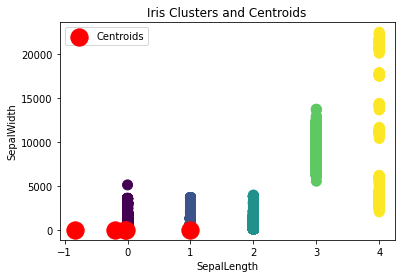

In [5]:
import matplotlib.pyplot as plt

x_precit = kmeans.predict(X)

plt.scatter(x_precit, y , s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 300, c = 'red',label = 'Centroids')
plt.title('Iris Clusters and Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

plt.show()

In [6]:
data_set['HouseholdRoutinesEncoder'] = kmeans.predict(X)

In [7]:
data_set.head()

,Day,Hour,PeriodOfDay,DayOfWeek,UnixTime,Duration,Watts1,Watts2,Watts3,WattsTotal,PeriodOfDayEncoder,DayOfWeekEncoder,HouseholdRoutinesEncoder
0,1,0,LateNight,Sunday,1627786806,14,163.01604,272.74854,0,435.76460,2,3,2
1,1,0,LateNight,Sunday,1627786820,14,155.36642,273.27606,0,428.64252,2,3,2
2,1,0,LateNight,Sunday,1627786834,14,155.10265,274.59497,0,429.69766,2,3,2
3,1,0,LateNight,Sunday,1627786848,14,156.15776,283.82730,0,439.98505,2,3,2
4,1,0,LateNight,Sunday,1627786862,14,157.74045,268.52805,0,426.26850,2,3,2


No handles with labels found to put in legend.


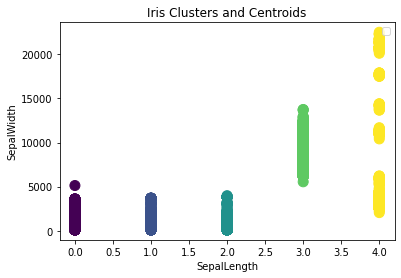

In [9]:
import matplotlib.pyplot as plt

plt.scatter(data_set.HouseholdRoutinesEncoder, data_set.WattsTotal , s = 100, c = kmeans.labels_)
plt.title('Iris Clusters and Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

plt.show()

In [26]:
data_set.loc[data_set.HouseholdRoutinesEncoder == 0, ['Watts1', 'Watts2']].describe()

,Watts1,Watts2
count,49685.000000,49685.000000
mean,133.387917,235.583622
std,82.383891,249.157358
min,39.039440,47.216618
25%,75.968640,135.846710
50%,121.866356,216.827160
75%,159.586910,268.000500
max,1544.695700,4829.020500
